In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import mpl_toolkits
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

reg = LinearRegression()

import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import preprocessing
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
import statistics
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline 


C:\Users\AJINKYA KUNJIR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AJINKYA KUNJIR\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sred=pd.read_csv("C:\Ajinkya\Studies\ADS\Assignment_1\sred.csv", sep=',')
sred.head() #reading the csv

,State,region,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
0,AK,West,20101,224952,160599,64352,28.6,1.481,1.552
1,AK,West,20102,225511,160252,65259,28.9,1.484,1.576
2,AK,West,20093,225820,163791,62029,27.5,1.486,1.494
3,AK,West,20094,224994,161787,63207,28.1,1.481,1.524
4,AK,West,20074,234590,155400,79190,33.8,1.544,1.885


In [3]:
dataset = sred.fillna(0)
X = dataset.iloc[:,[3,5]].values
X #array of most co-linear columns

array([[224952,  64352],
       [225511,  65259],
       [225820,  62029],
       ..., 
       [690234, 523532],
       [705645, 537666],
       [722514, 553225]], dtype=int64)

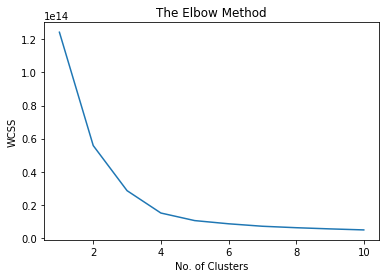

In [4]:
#using elbow method to find the optimal no. of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    #inertia - sum of squares within clusters
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

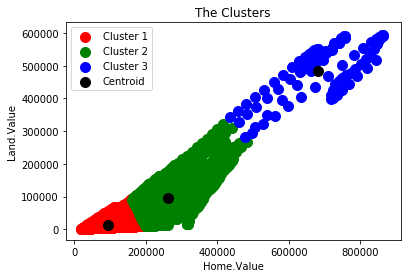

In [5]:
#1st Clustering Method

# Applying k-means to the dataset

kmeans = KMeans(n_clusters=3, init = 'k-means++',max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#display the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2, 1], s = 100, c = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100 , c = 'black', label = 'Centroid')
plt.title('The Clusters')
plt.xlabel('Home.Value')
plt.ylabel('Land.Value')
plt.legend()
plt.show()

#the black point is a centroid of all the respective clusters

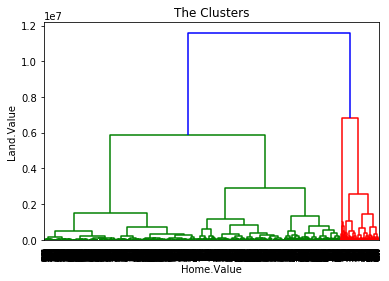

In [6]:
#using dendrogram to find the optimal no. of clusters

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))     #minimize variance for clusters
plt.title('The Clusters')
plt.xlabel('Home.Value')
plt.ylabel('Land.Value')
plt.show()


#draw horizontal lines from the top edges and consider the vertical line having the largest distance
#then draw a horizontal line passing through all the vertical lines coming in between and count the lines it is crossing to give the no of  clusters


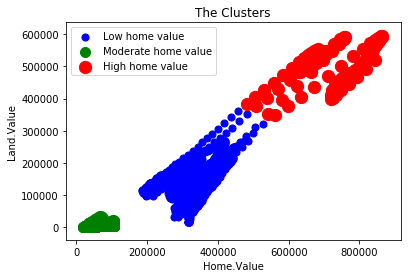

In [7]:
#Second Clustering Method
#Applying hierarchical clustering (agglomerative - top down)to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#display the clusters

plt.scatter(X[y_hc == 0,0], X[y_hc ==0, 1], s = 50, c = 'red', label = 'Low home value')
plt.scatter(X[y_hc == 1,0], X[y_hc ==1, 1], s = 100, c = 'green', label = 'Moderate home value')
plt.scatter(X[y_hc == 2,0], X[y_hc ==2, 1], s = 150, c = 'blue', label = 'High home value')

plt.title('The Clusters')
plt.xlabel('Home.Value')
plt.ylabel('Land.Value')
plt.legend()
plt.show()

In [8]:
sred.corr() #to find out maximum correlations between the columns

,Date,Home.Value,Structure.Cost,Land.Value,Land.Share..Pct.,Home.Price.Index,Land.Price.Index
Date,1.000000,0.685790,0.867730,0.347040,0.167530,0.915912,0.526064
Home.Value,0.685790,1.000000,0.809578,0.877855,0.622691,0.832904,0.534961
Structure.Cost,0.867730,0.809578,1.000000,0.429556,0.210793,0.867814,0.564230
Land.Value,0.347040,0.877855,0.429556,1.000000,0.785947,0.573287,0.362627
Land.Share..Pct.,0.167530,0.622691,0.210793,0.785947,1.000000,0.351577,0.301058
Home.Price.Index,0.915912,0.832904,0.867814,0.573287,0.351577,1.000000,0.691867
Land.Price.Index,0.526064,0.534961,0.564230,0.362627,0.301058,0.691867,1.000000


In [9]:
#As we can see that max correlation is between the  Structure.Cost, Land.Value and Home.Price.Index, we will try to fit the model based on these 3 column

X = sred[["Structure.Cost", "Land.Value", "Home.Price.Index"]]
y = sred[["Home.Value"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-0.01228234] [[ 0.99999994  0.99999992  0.02602374]]


In [10]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

#we got r-squared=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Home.Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.009e+14
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:56:06   Log-Likelihood:                -5740.4
No. Observations:                7803   AIC:                         1.149e+04
Df Residuals:                    7800   BIC:                         1.151e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Structure.Cost       1.0000   2.04e-07   4.91e+06      0.000       1.000       1.000
Land.Value           1.0000      1e-07      1e+07      0.000       1.000       1.000
Home.Price.Index     0.0189      0.025      0.764      0.445      -0.030       0.067
==============================================================================
Omnibus:                      135.728   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.749
Skew:                           0.004   Prob(JB):                     1.32e-60
Kurtosis:                       3.921   Cond. No.                     5.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#Predicting without splitting the dataset into test and train.
ypred=results.predict()
print(ypred)

[ 224951.00833554  225511.00837456  225820.0082465  ...,  690233.00316132
  705644.00333654  722514.00353981]


In [12]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold


#Calculating the root mean squared error of the fit regression line based on independent variables 
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)

0.504964685787


In [13]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean

Home.Value    0.000004
dtype: float64


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [15]:
reg_all.score(X_test, y_test)

0.99999999997542366

In [16]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not. Also, 'x', 'y' and 'z' had very close levels of co-relation with price which makes us to investigate whether all 
# three are important or not.
indep=['Home.Value','Structure.Cost','Land.Value','Home.Price.Index']
X=sred[indep] 

thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

vif : [115723196221.97231, 51205198601.174461, 23578068077.622383, 18.853445652740138]
Home.Value
Final variables:  ['Structure.Cost', 'Land.Value', 'Home.Price.Index']
vif : [16.543205237244425, 1.839318128810683, 18.852036126208976]
Home.Price.Index
Final variables:  ['Structure.Cost', 'Land.Value']


In [17]:
#Finding and plotting correlations

X = sred[["Structure.Cost", "Land.Value"]]
y = sred[["Home.Value"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[-0.00889065] [[ 1.00000012  0.99999996]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Home.Value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.513e+14
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:59:16   Log-Likelihood:                -5740.7
No. Observations:                7803   AIC:                         1.149e+04
Df Residuals:                    7801   BIC:                         1.150e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Structure.Cost     1.0000   6.19e-08   1.61e+07      0.000       1.000       1.000
Land.Value         1.0000   9.13e-08    1.1e+07      0.000       1.000       1.000
==============================================================================
Omnibus:                      135.751   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.819
Skew:                           0.003   Prob(JB):                     1.28e-60
Kurtosis:                       3.921   Cond. No.                         2.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [19]:
reg_all.score(X_test, y_test)

0.99999999997541877

In [20]:
X = sred[["Structure.Cost", "Home.Price.Index"]]
y = sred[["Home.Value"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

#we get r-squared=0.889

[-27881.06386689] [[  6.62673072e-01   1.11834705e+05]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Home.Value   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 3.131e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:10:43   Log-Likelihood:                -96545.
No. Observations:                7803   AIC:                         1.931e+05
Df Residuals:                    7801   BIC:                         1.931e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Structure.Cost       0.5399      0.022     24.054      0.000       0.496       0.584
Home.Price.Index  1.013e+05   2557.627     39.594      0.000    9.63e+04    1.06e+05
==============================================================================
Omnibus:                     6189.513   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150974.641
Skew:                           3.696   Prob(JB):                         0.00
Kurtosis:                      23.241   Cond. No.                     4.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,y_test))
print(results.score(X_train,y_train))

#predicting the results of test and train data

0.999999999975
0.999999999978


In [22]:
X = sred[["Structure.Cost"]]
y = sred[["Home.Value"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

[-16625.46021929] [[ 1.52649981]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Home.Value   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 5.085e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:11:15   Log-Likelihood:                -97259.
No. Observations:                7803   AIC:                         1.945e+05
Df Residuals:                    7802   BIC:                         1.945e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Structure.Cost     1.3998      0.006    225.489      0.000       1.388       1.412
==============================================================================
Omnibus:                     7270.040   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           277367.444
Skew:                           4.564   Prob(JB):                         0.00
Kurtosis:                      30.745   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

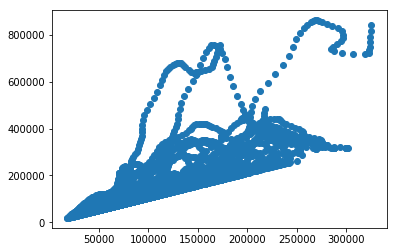

In [23]:
X = sred[["Structure.Cost"]]
y = sred[["Home.Value"]]
plt.plot(X, y, "o")

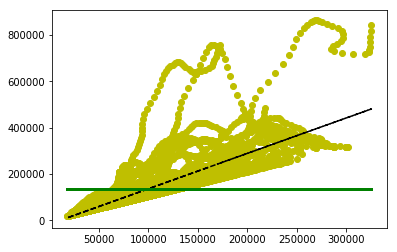

In [24]:
n=555
X = sred["Structure.Cost"]
y = sred["Home.Value"]
fit= np.polyfit(X, y, 1)
fit_fn = np.poly1d(fit)
plt.plot(X,y, 'yo', X, fit_fn(X), '--k')
x2 = np.linspace(np.amin(X),np.amax(X),n)
y2 = np.ones(n)*np.mean(y)
plt.plot(x2, y2, lw=3, color="g")
plt.show()

In [25]:
#Calculating the VIF factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sred[["Home.Value","Structure.Cost","Land.Value","Home.Price.Index"]]
DataFrame=X
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

     VIF Factor          features
0  1.157232e+11        Home.Value
1  5.120520e+10    Structure.Cost
2  2.357807e+10        Land.Value
3  1.885345e+01  Home.Price.Index


In [26]:
#Predicting testing set for Home Value column
print(pred_test)

[[  28086.99886955]
 [ 150697.99500633]
 [  59388.99863291]
 ..., 
 [ 110386.99582404]
 [ 161459.99524177]
 [  67670.99735791]]


In [27]:
#Predicting training set for Home Value column

print(pred_train)

[[ 120385.99546502]
 [ 147420.99657766]
 [ 157806.99666262]
 ..., 
 [ 283921.00598391]
 [ 143973.99589418]
 [ 100663.99617318]]


In [28]:
rmsetrain = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(rmsetest)
#Even the rmse's do not vary much

0.501345585516
0.51361355047


In [29]:
#Cross validation
#R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
# represent the model's ability to generalize. For this we perform cross validation.

reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[ 1.  1.  1.  1.  1.]
1.0
0.0


In [30]:
#Regularization
#We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature
# variable. And as we know, large coefficients leads to overfitting.

#Ridge Regularization
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.99564474868134401

In [31]:
#Lasso Regularization
lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[ 1.  0.  0.  0.]


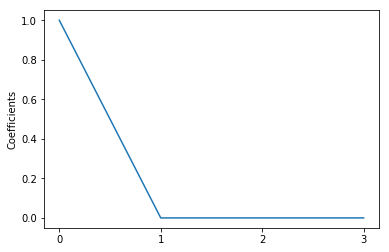

In [32]:
_ =plt.plot(range(len(X.T)),lasso_coef)
_ =plt.xticks(range(len(X.T)), X.T)
_ =plt.ylabel('Coefficients')
plt.show()
#As we can see from the lasso regression, it is very evident that "Land.Value" which is at the 2nd position of the X plays a huge factor
# in the increase radiation

In [33]:
housing=pd.read_csv("C:\Ajinkya\Studies\ADS\housing.csv", sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


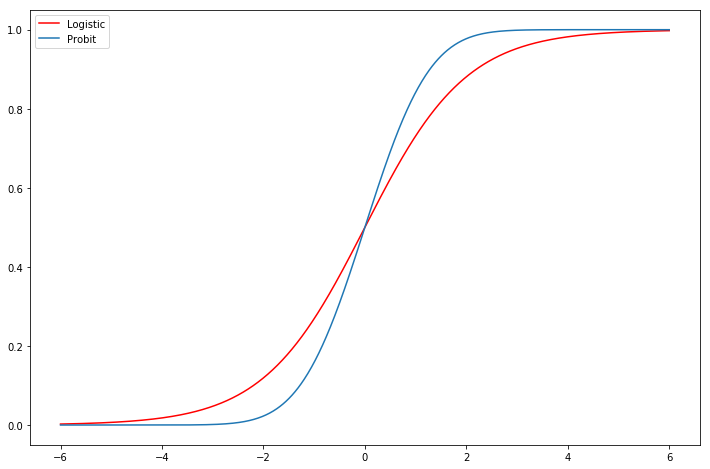

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), 'r-', label='Logistic')
ax.plot(support, stats.norm.cdf(support), label='Probit')
ax.legend();

In [38]:
housing_data = housing.ix[:, (0,1,2)].values #indexes of columns used for logistic regression
housing_data_names = ['longitude','latitude','housing_median_age']
y= housing.ix[:,9].values

C:\Users\AJINKYA KUNJIR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


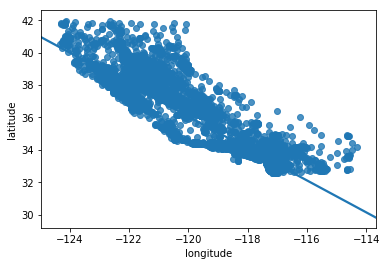

In [39]:
sns.regplot(x= 'longitude', y='latitude', data = housing, scatter=True) 

In [40]:
housing.corr() #to find the maximum correlation between the columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [41]:
housing.groupby('ocean_proximity').count() #categorizing according to ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
NEAR BAY,8846,8846,8846,8846,8771,8846,8846,8846,8846
NEAR OCEAN,11794,11794,11794,11794,11662,11794,11794,11794,11794


In [42]:
housing.groupby('ocean_proximity').median()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
NEAR BAY,-121.23,37.73,27.0,2116.0,423.0,1094.0,389.0,3.1583,126900.0
NEAR OCEAN,-118.27,34.02,30.0,2131.5,444.0,1222.0,423.0,3.8158,217700.0


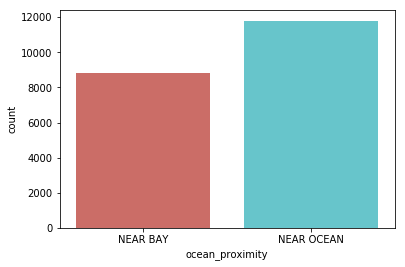

In [43]:
sns.countplot(x='ocean_proximity', data = housing, palette='hls') #countplot showing the 'NEAR BAY' and 'NEAR OCEAN' value

In [44]:
X= scale(housing_data) #scaling the data did not affected the result

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#training and testing data for logistic regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_pred = logreg.predict(X_test)
print (y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

['NEAR OCEAN' 'NEAR OCEAN' 'NEAR BAY' ..., 'NEAR OCEAN' 'NEAR BAY'
 'NEAR OCEAN']
Accuracy of logistic regression classifier on test set: 0.91


In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.906


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#Confusion matrix

array([[2252,  394],
       [ 179, 3367]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
#Classification Report
target_names = ['BAY AREA ', 'OCEAN AREA ']
print(classification_report(y_test, y_pred, target_names=target_names))

#the final classification report

             precision    recall  f1-score   support

  BAY AREA        0.93      0.85      0.89      2646
OCEAN AREA        0.90      0.95      0.92      3546

avg / total       0.91      0.91      0.91      6192

